In [181]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

plt.style.use("seaborn-v0_8")

## Згенеруємо данні

In [182]:
m = 20  # - кількість експерементальних точок
n = 20  # - кількість вимірювань в кожній точці

x_ = np.linspace(0, 5, n)
y_ = np.zeros((m, n))

for i in range(m):
    y_ [:,i] = np.cos(x_) + 0.37 * np.random.randint(5)

print(y_)
print(x_)

[[ 1.37        2.11        1.37        1.37        1.          1.
   2.11        1.37        1.37        2.48        2.48        1.37
   1.          2.11        1.37        1.37        1.          1.
   2.48        2.48      ]
 [ 1.33557333  2.07557333  1.33557333  1.33557333  0.96557333  0.96557333
   2.07557333  1.33557333  1.33557333  2.44557333  2.44557333  1.33557333
   0.96557333  2.07557333  1.33557333  1.33557333  0.96557333  0.96557333
   2.44557333  2.44557333]
 [ 1.2346637   1.9746637   1.2346637   1.2346637   0.8646637   0.8646637
   1.9746637   1.2346637   1.2346637   2.3446637   2.3446637   1.2346637
   0.8646637   1.9746637   1.2346637   1.2346637   0.8646637   0.8646637
   2.3446637   2.3446637 ]
 [ 1.07421909  1.81421909  1.07421909  1.07421909  0.70421909  0.70421909
   1.81421909  1.07421909  1.07421909  2.18421909  2.18421909  1.07421909
   0.70421909  1.81421909  1.07421909  1.07421909  0.70421909  0.70421909
   2.18421909  2.18421909]
 [ 0.86528663  1.60528663  0.

## Проведемо аналіз отриманих данних

In [183]:
mean = np.mean(y_, axis=0)
std = np.std(y_, axis=0)
print("mean ->", mean)
print("std ->", std)

mean -> [ 0.22094861  0.96094861  0.22094861  0.22094861 -0.14905139 -0.14905139
  0.96094861  0.22094861  0.22094861  1.33094861  1.33094861  0.22094861
 -0.14905139  0.96094861  0.22094861  0.22094861 -0.14905139 -0.14905139
  1.33094861  1.33094861]
std -> [0.67420588 0.67420588 0.67420588 0.67420588 0.67420588 0.67420588
 0.67420588 0.67420588 0.67420588 0.67420588 0.67420588 0.67420588
 0.67420588 0.67420588 0.67420588 0.67420588 0.67420588 0.67420588
 0.67420588 0.67420588]


## Проведемо пошук аномалій

In [184]:
anomalies = []
for i in range(n):
    data = y_[:, i]
    mean = np.mean(data)
    std_dev = np.std(data)
    threshold = 3 * std_dev
    anomaly_indices = np.where(np.abs(data - mean) > threshold)
    anomalies.append(anomaly_indices)


for i, anomaly_indices in enumerate(anomalies):
    if len(anomaly_indices[0]) > 0:
        print(f" аномалії в вимірюваннях {i + 1}: {anomaly_indices[0]}")
    else:
        print(f" нема аномалій в вимірюваннях {i + 1}")

 нема аномалій в вимірюваннях 1
 нема аномалій в вимірюваннях 2
 нема аномалій в вимірюваннях 3
 нема аномалій в вимірюваннях 4
 нема аномалій в вимірюваннях 5
 нема аномалій в вимірюваннях 6
 нема аномалій в вимірюваннях 7
 нема аномалій в вимірюваннях 8
 нема аномалій в вимірюваннях 9
 нема аномалій в вимірюваннях 10
 нема аномалій в вимірюваннях 11
 нема аномалій в вимірюваннях 12
 нема аномалій в вимірюваннях 13
 нема аномалій в вимірюваннях 14
 нема аномалій в вимірюваннях 15
 нема аномалій в вимірюваннях 16
 нема аномалій в вимірюваннях 17
 нема аномалій в вимірюваннях 18
 нема аномалій в вимірюваннях 19
 нема аномалій в вимірюваннях 20


## Знайдемо кореляцію в вимірюваннях

In [185]:
correlation_matrix = np.corrcoef(y_, rowvar=False)
print("матриця кореляцій")
print(correlation_matrix)

матриця кореляцій
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

## Обчислимо дисперсію

In [186]:
variance = np.var(y_, axis=0)
print("variance ->")
print(variance)

variance ->
[0.45455357 0.45455357 0.45455357 0.45455357 0.45455357 0.45455357
 0.45455357 0.45455357 0.45455357 0.45455357 0.45455357 0.45455357
 0.45455357 0.45455357 0.45455357 0.45455357 0.45455357 0.45455357
 0.45455357 0.45455357]


## Перейдемо до побудови графіків

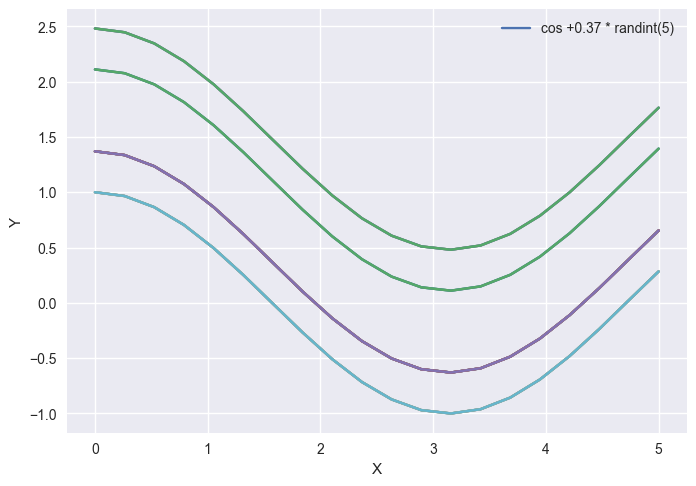

In [187]:
plt.figure()
for i in range(n):
    if i == 0:
        plt.plot(x_, y_[:,i], label=f'cos +0.37 * randint(5)')
    else:
        plt.plot(x_, y_[:,i])

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## Графік очікуваної функції

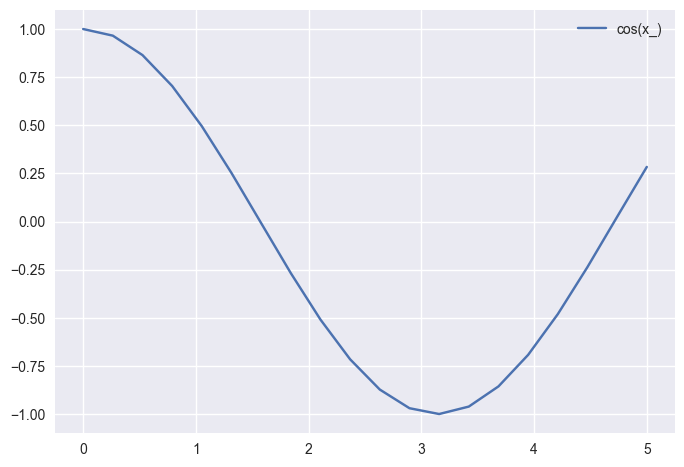

In [188]:
plt.figure()
plt.plot(x_, np.cos(x_), label="cos(x_)")
plt.legend()
plt.show()  # Показати графік

## Середнє з вусами похибки

ValueError: 'x' and 'y' must have the same size

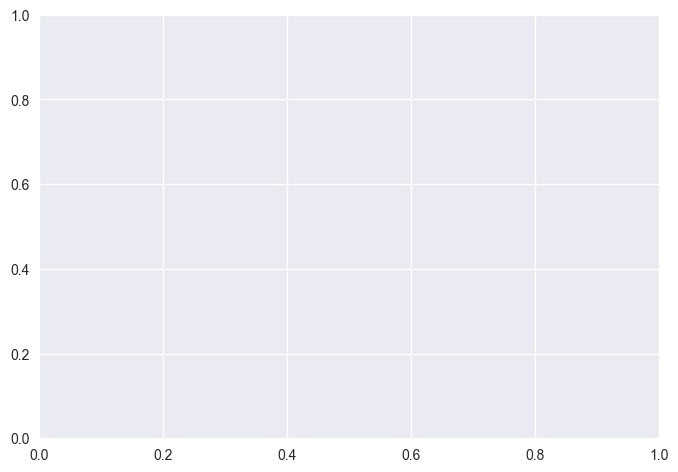

In [189]:
confidence = 1.96 * (np.std(y_, axis=0) / np.sqrt(m))
plt.figure()
plt.errorbar(x_, mean, yerr=confidence, fmt='-')
plt.plot(x_, np.cos(x_), '--', label='Косинус-функція')
plt.legend()
plt.show()